<a href="https://colab.research.google.com/github/usjay/multiclass_tree_classifier/blob/main/multiclass_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
# Step 1: Upload the dataset
uploaded = files.upload()


Saving dataset_1.csv to dataset_1.csv


In [ ]:
# Step 2: Load the dataset
data = pd.read_csv("dataset_1.csv")

# Print the column names
print(data.columns)


Index(['Ratio', 'Angle1 ', 'Angle 2', 'Name'], dtype='object')


In [ ]:
# Step 3: Preprocess data
# Update these column names based on the actual column names in your dataset
X = data[['Ratio', 'Angle1 ', 'Angle 2']]  # Selecting feature columns with correct names
y = data['Name']  # Selecting the label column

In [ ]:
# Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.0741 - accuracy: 0.1840 - val_loss: 1.1277 - val_accuracy: 0.1111
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 1.9972 - accuracy: 0.1528 - val_loss: 1.1186 - val_accuracy: 0.1111
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 1.9455 - accuracy: 0.1458 - val_loss: 1.1094 - val_accuracy: 0.1528
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 1.8693 - accuracy: 0.1701 - val_loss: 1.1003 - val_accuracy: 0.1667
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 1.8346 - accuracy: 0.2083 - val_loss: 1.0913 - val_accuracy: 0.2083
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1.8307 - accuracy: 0.1910 - val_loss: 1.0823 - val_accuracy: 0.2222
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 1.6137 - accuracy: 0.2222 - val_loss: 1.0734 - val_accuracy: 0.3333
Epoch 8/100
1/1 [=====

In [ ]:
# Step 7: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.9556
Test Accuracy: 0.9556


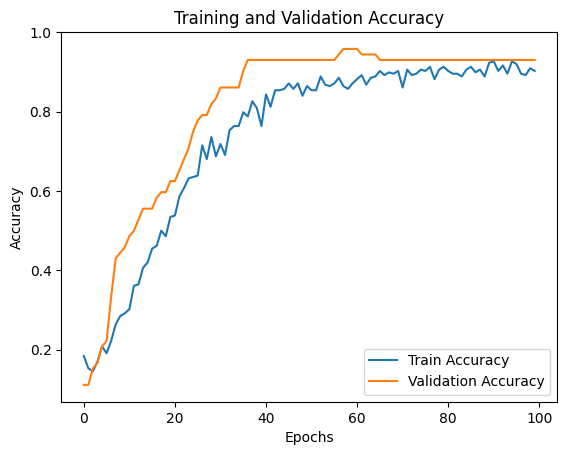

In [ ]:
# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

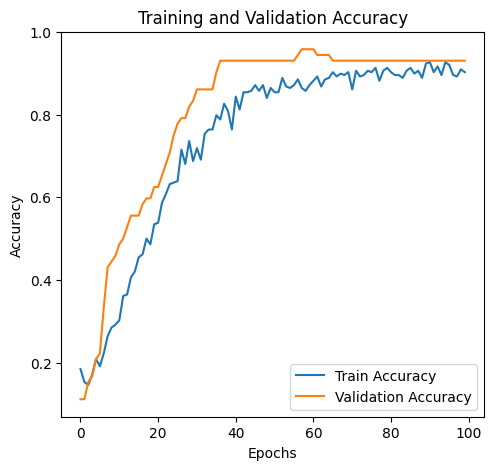

In [ ]:
# Step 8: Plot accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [ ]:
# Step 6: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Step 7: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 0s 114ms/step - loss: 0.2965 - accuracy: 0.8819 - val_loss: 0.4913 - val_accuracy: 0.9306
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2810 - accuracy: 0.9167 - val_loss: 0.4879 - val_accuracy: 0.9306
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2768 - accuracy: 0.9201 - val_loss: 0.4845 - val_accuracy: 0.9306
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2749 - accuracy: 0.9097 - val_loss: 0.4812 - val_accuracy: 0.9306
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 0.2758 - accuracy: 0.9062 - val_loss: 0.4780 - val_accuracy: 0.9306
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2717 - accuracy: 0.9167 - val_loss: 0.4748 - val_accuracy: 0.9306
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2620 - accuracy: 0.9028 - val_loss: 0.4716 - val_accuracy: 0.9306
Epoch 8/100
1/1 [==

In [ ]:
# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 11ms/step - loss: 0.2512 - accuracy: 0.9556
Test Accuracy: 0.9556


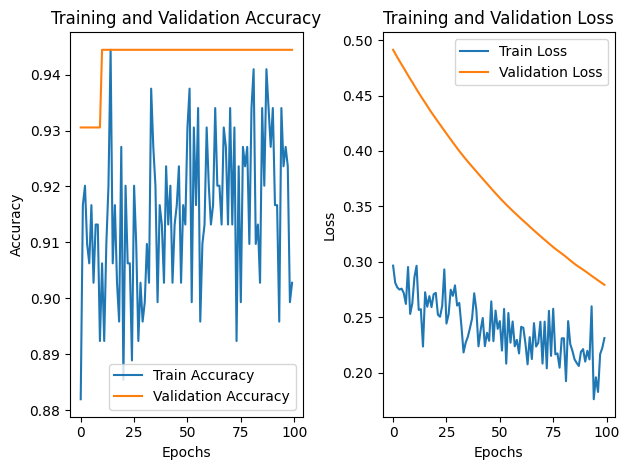

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [ ]:
# Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 100 epochs


In [ ]:
from sklearn.model_selection import GridSearchCV
# Assuming `model` is your trained model

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Decode the class labels if you used LabelEncoder
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print some example predictions
for i in range(90):  # Print the first 10 predictions
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")


3/3 [==============================] - 0s 5ms/step
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 